## Forward Error in QR

In [0]:
n = 128
println("Size of matrix ", n)

# Initialize the matrix
Qe, Re = qr(rand(n,n))
# Qe is orthogonal, Re is upper triangular
for i = 1 : n
    # Multiply row i by 1/2^i
    Re[i,:] = 1.0/2.0^(i-1) * Re[i,:]
end

# A = Qe * Re
A = Qe * Re
# Compute QR factorization of A
Q, R = qr(A)

# Fix possible differences in the sign of the diagonal entries of R
for i = 1 : n
    if R[i,i] * Re[i,i] < 0
        R[i,:] = -R[i,:]
        Q[:,i] = -Q[:,i]
    end
end

# We now expect that Q=Qe and R=Re.

# Calculate the error in Q
err = zeros(n)
for j = 1 : n
    # Processing column j
    err[j] = norm(Q[:,j] - Qe[:,j])
end

Size of matrix 128


In [0]:
using Plots
pyplot()

Plots.PyPlotBackend()


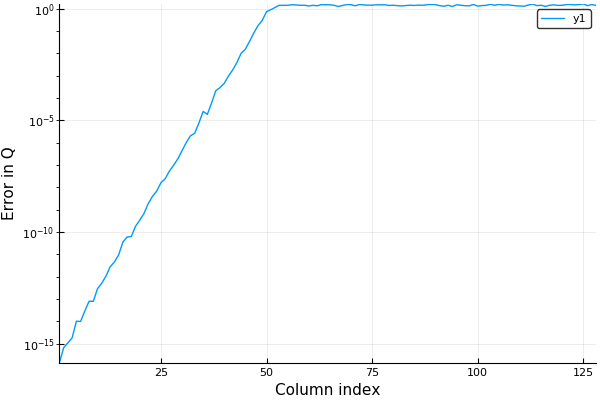

In [0]:
# Plot the error in Q
plot(err, yscale=:log10)
xlabel!("Column index")
ylabel!("Error in Q")

#### Explain why the error in the columns of Q becomes very large. Consider roundoff errors that occur during the calculation. In double precision, the computer represents floating point numbers using only approximately 16 decimals digits.

Observation: As i gets from zeros to around 53, the error in $Q$ gets linearly from zero to $2^0 = 1$. Starting from 53 to 128, error stays big and the addition no longer adds up. <br>
Assume Gram-Schimdt for this QR decomposition. In double precision, we know that the floating points are represented using 16 decimal digits. Then, since $2^{53} = 1.11 * 10^{-16}$, the 53 bit significand precision gives about 16 significant digits precision. <br>
As seen from previous homework, we know digits beyond certain point would be dropped during addition. Since $Q1$ has norm of 1 as it is orthogonalized, the order of $Q1$ is 1 initially. Then, it would be '1.[(53-i) significands]' where error is $O(2^{-53+i})$ <br>
$Q1$ has 53-i significand where i is column index. At each step of QR, $R$ is decreading in a way that some digits would be dropped linearly as shown in graph. The decomposition is like
$A_k = R_{1k}Q_1 + R_{2k}Q_2 + ... + R_{kk}Q_k$ where each term has order $1, 2$, ..., $2^{-k+1}$ respectively. However, when adding these up, the latter terms might be too far from the decimal point. And when k > 53, the whole value exceeds the limit and diusappears. And thinking of this decomposition, the part starting from $Q_{53}$ up to $Q_{128}$ doesn't cound towards the decomposition. 